In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from tqdm import tqdm
import numpy as np
from copy import deepcopy

import rospy
import actionlib

from tams_pr2_guzheng.paths import RuckigPath
from tams_pr2_guzheng.utils import *
from tams_pr2_guzheng.msg import RunEpisodeAction


In [2]:
rospy.init_node('jupyter', anonymous=True)

In [3]:
run_episode = actionlib.SimpleActionClient('run_episode', RunEpisodeAction)
run_episode.wait_for_server()

True

In [4]:
if os.path.exists('/tmp/plucks.json'):
    plucks = pd.read_json('/tmp/plucks.json')
else:
    plucks = pd.DataFrame(columns=[])

<AxesSubplot:xlabel='y'>

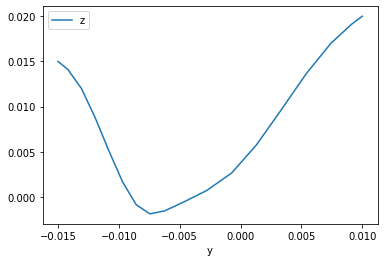

In [32]:
p = RuckigPath.random(note= 'b3', string_position=.17)
p.dataframe.plot(x='y', y='z')

In [33]:
result = run_params(run_episode, p, finger= 'ff')
row = row_from_result(result)
row['params'] = result.parameters
row_df = pd.DataFrame(row, columns= row.keys(), index= [0])
plucks = pd.concat((plucks, row_df), ignore_index=True)

NameError: name 'plucks' is not defined

<AxesSubplot:xlabel='y'>

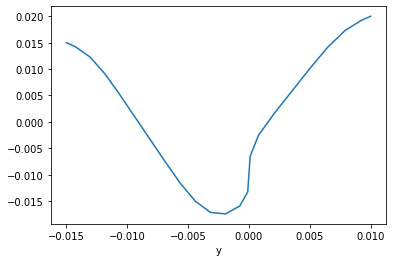

In [59]:
p = deepcopy(original_p)
p.keypoint_pos = [0.0, -0.01]
p.keypoint_vel = [0.00, 0.08]
p.dataframe.plot(x='y', y='z', legend=False)

In [33]:
p.dataframe

,time,y,z
0,0.000000,0.000000,0.000000
1,0.047876,0.000146,0.000146
2,0.095753,0.001088,0.001171
3,0.143629,0.002624,0.003827
4,0.191505,0.004208,0.007796
5,0.239382,0.005792,0.012204
6,0.287258,0.007376,0.016173
7,0.335134,0.008912,0.018829
8,0.383011,0.009854,0.019854
9,0.430887,0.010000,0.020000


In [97]:
original_p = deepcopy(p)

In [94]:
p = deepcopy(original_p)

In [11]:
p.params

[0.1,
 0.1,
 1.0,
 1.5,
 8.0,
 8.0,
 0.015,
 0.015,
 -0.01,
 0.02,
 0.000692525765279995,
 -0.0034348069794676115,
 -0.058144151722084626,
 0.026020003232748536,
 0.17]

In [76]:
def add_noise(path):
    path.keypoint_pos = np.clip(np.array(path.keypoint_pos) + np.random.normal(0.0, 5e-4, 2), -1.0, 1.0).tolist()
    vel = np.array(path.keypoint_vel) + np.random.normal(0.0, 1e-3, 2)
    vel[0] = np.clip(vel[0], *sorted(path.direction * np.array([0, 0.1])))
    vel[1] = np.clip(vel[1], 0.0, 0.008)
    path.keypoint_vel = vel.tolist()

In [77]:
add_noise(p)

In [78]:
p.keypoint_pos

[0.002921193711925569, 7.958925378206532e-05]

In [84]:
target= 35.0
for n in tqdm(range(1)):
    p = RuckigPath.from_action_parameters(plucks.iloc[np.abs(plucks['loudness']-target).argmin()]['params'])
    add_noise(p)
    result = run_params(run_episode, p, finger= 'ff')
    row = row_from_result(result)
    print(f"loudness: {row['loudness']}")
    row['params'] = result.parameters
    row_df = pd.DataFrame(row, columns= row.keys(), index= [0])
    plucks = pd.concat((plucks, row_df), ignore_index=True)

100%|██████████| 1/1 [00:07<00:00,  7.70s/it]

loudness: 32.82822799682617


<AxesSubplot:xlabel='loudness'>

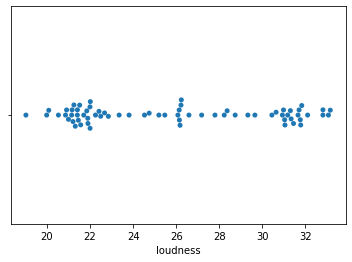

In [80]:
sns.swarmplot(x= plucks['loudness'])

In [56]:
np.abs(plucks['loudness']- 20).argmin()

1

In [ ]:
plucks

,note,max_vel_y,max_vel_z,max_acc_y,max_acc_z,max_jerk_y,max_jerk_z,pre_y,pre_z,post_y,post_z,keypoint_pos_y,keypoint_pos_z,keypoint_vel_y,keypoint_vel_z,string_position,onset_cnt,loudness,detected_note,params
0,b3,0.1,0.1,1.0,1.5,8.0,8.0,-0.015,0.015,0.01,0.02,0.0028,-0.004353,0.033185,0.027309,0.17,1,29.446091,B3,header: \n seq: 0\n stamp: \n secs: 0\n ...
1,b3,0.1,0.1,1.0,1.5,8.0,8.0,-0.015,0.015,0.01,0.02,0.0028,-0.004353,0.033185,0.027309,0.17,1,29.299351,B3,header: \n seq: 0\n stamp: \n secs: 0\n ...
2,b3,0.1,0.1,1.0,1.5,8.0,8.0,-0.015,0.015,0.01,0.02,0.0028,-0.004353,0.033185,0.027309,0.17,0,NaN,NaN,header: \n seq: 0\n stamp: \n secs: 0\n ...


In [85]:
plucks.to_json('/tmp/plucks.json')

In [88]:
target = 25
p = RuckigPath.from_action_parameters(plucks.iloc[np.abs(plucks['loudness']-target).argmin()]['params'])

In [34]:
plucks_along_string = pd.DataFrame(columns=[])

In [45]:
for n in tqdm(np.repeat(np.arange(0.35, 0.4, 0.02), 3)):
    print(n)
    p.string_position = n
    result = run_params(run_episode, p, finger= 'ff')
    row = row_from_result(result)
    print(f"loudness: {row['loudness']}")
    row['params'] = result.parameters
    row_df = pd.DataFrame(row, columns= row.keys(), index= [0])
    plucks_along_string = pd.concat((plucks_along_string, row_df), ignore_index=True)

  0%|          | 0/9 [00:00<?, ?it/s]

0.35


 11%|█         | 1/9 [00:07<01:03,  7.97s/it]

loudness: 20.902320861816406
0.35


 22%|██▏       | 2/9 [00:16<00:56,  8.04s/it]

loudness: 20.204599380493164
0.35


 33%|███▎      | 3/9 [00:24<00:48,  8.02s/it]

loudness: 21.16193389892578
0.37


 44%|████▍     | 4/9 [00:32<00:40,  8.15s/it]

loudness: 18.85198402404785
0.37


 56%|█████▌    | 5/9 [00:40<00:32,  8.14s/it]

loudness: 18.110340118408203
0.37


 67%|██████▋   | 6/9 [00:48<00:24,  8.13s/it]

loudness: 19.575490951538086
0.39


 78%|███████▊  | 7/9 [00:56<00:16,  8.14s/it]

loudness: 17.352783203125
0.39


 89%|████████▉ | 8/9 [01:04<00:08,  8.14s/it]

loudness: 18.173933029174805
0.39


100%|██████████| 9/9 [01:12<00:00,  8.09s/it]

loudness: 18.054935455322266


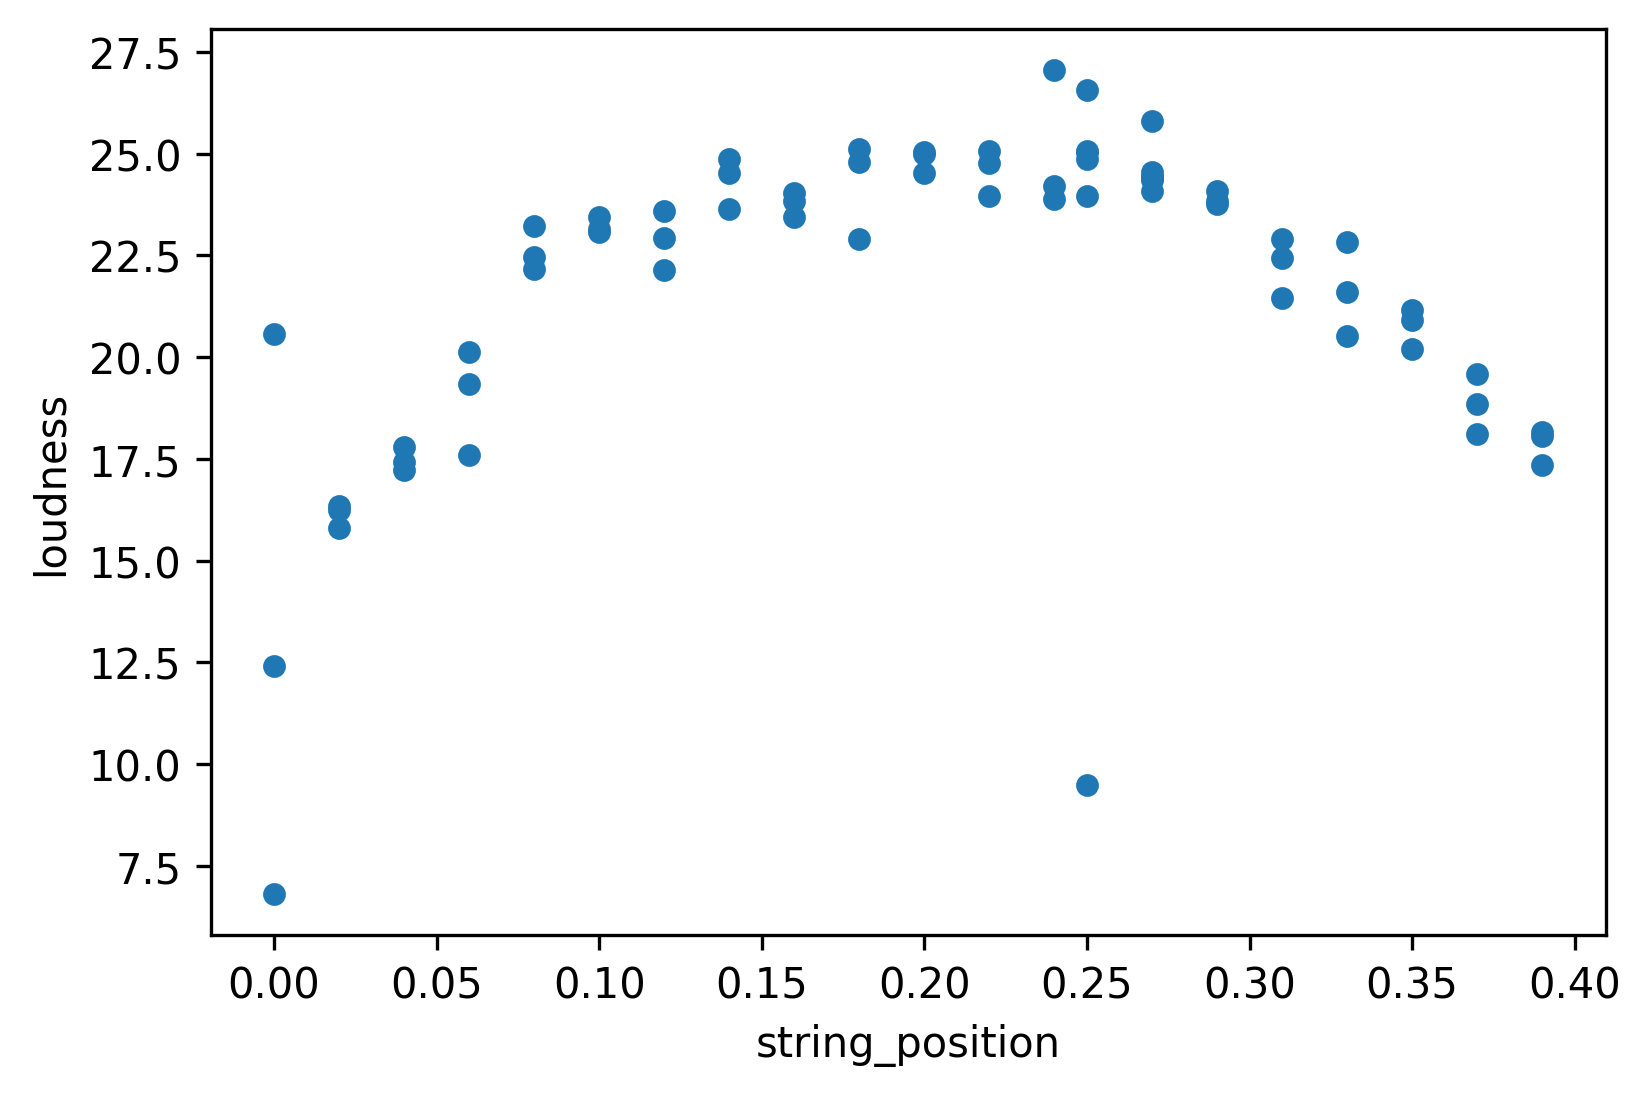

In [50]:
f=plt.figure(dpi=300)
plucks_along_string.plot(kind='scatter', x='string_position', y='loudness', ax=f.gca())
f.savefig('/tmp/plucks_along_string.png')

In [ ]:
plucks_along_string.to_json('/tmp/plucks_along_string.json')